данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.\
Задания\
1.	Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.\
2.	Постройте график по числу поездок по дате и времени.\
3.	Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.\
4.	Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.\
5.	Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.\
6.	Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.\
7.	Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.\
8.	Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.\
Описание данных\
•	timestamp – дата и время (точность до часа)\
•	cnt – количество аренд велосипедов за этот час\
•	t1 – температура, в С\
•	t2 – температура "ощущается как", в С \
•	hum – влажность (%)\
•	wind_speed – скорость ветра, км/ч\
•	weather_code – погодные условия:\
1 – ясно (SKC)\
2 – преимущественно ясно / встречаются отдельные облака (SCT)\
3 – облачно / значительные облака (BKN)\
4 – пасмурно (OVC)\
7 – небольшой дождь Rain/ light Rain shower/ Light rain \
10 – дождь с грозой\
26 – снегопад \
94 – ледяной туман (да, такое бывает!)\
•	isholiday – является ли день праздником (1 – праздник, 0 – нет)\
•	isweekend –  является ли день выходным (1 – выходной, 0 – нет)\
•	season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)



In [1]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")
import numpy as np 
import plotly as pl

In [2]:
df = pd.read_csv('C:/Users/spit/Desktop/math/3/3.6 london.csv')

Проверка данных

In [3]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
df.shape

(17414, 10)

In [7]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

#### Постройте график по числу поездок по дате и времени.

<Axes: xlabel='timestamp', ylabel='cnt'>

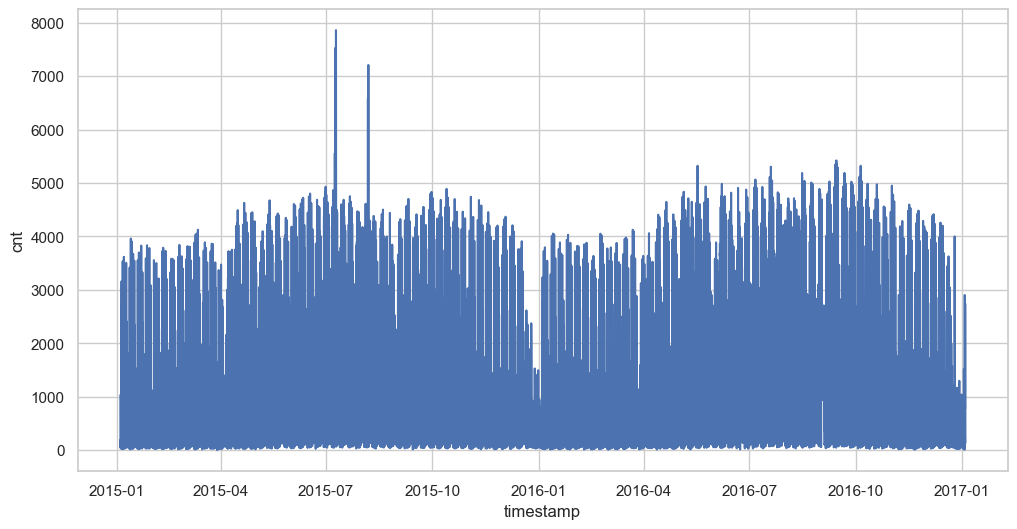

In [8]:
sns.lineplot(data=df, x = 'timestamp', y='cnt')

Очень сложно что-то понять, нужно преобразовать данные.

#### Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.

In [9]:
df.sort_values(by='timestamp')
df.set_index('timestamp', drop=False, inplace=True)

In [10]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<Axes: xlabel='timestamp'>

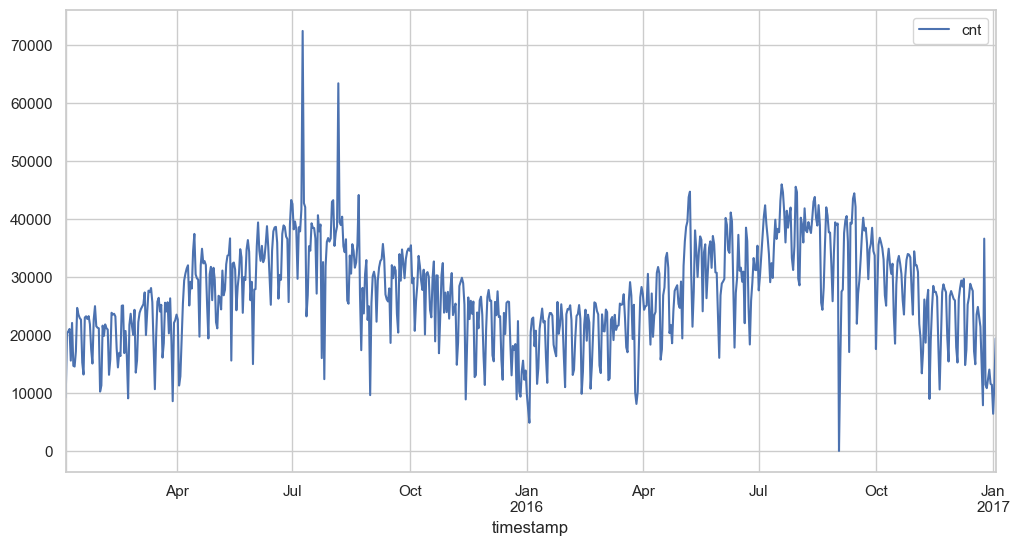

In [11]:
df.resample('D').agg({'cnt':'sum'}).plot()

Вывод:\
    Зимой аренд меньше, чем летом\
    макс > 70000\
    встерчается как резкий скачек вверх, так и вниз

#### Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [12]:
df_by_day = df.resample('D').agg({'cnt':'sum'}).reset_index()
df_by_day

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
726,2016-12-30,11566
727,2016-12-31,11424
728,2017-01-01,6421
729,2017-01-02,11823


In [13]:
df_by_day_roll = df.resample('D').agg({'cnt':'sum'}).rolling(window=3).mean().reset_index()
df_by_day_roll

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,16739.666667
3,2015-01-07,20683.000000
4,2015-01-08,19092.666667
...,...,...
726,2016-12-30,12682.000000
727,2016-12-31,12347.333333
728,2017-01-01,9803.666667
729,2017-01-02,9889.333333


<Axes: >

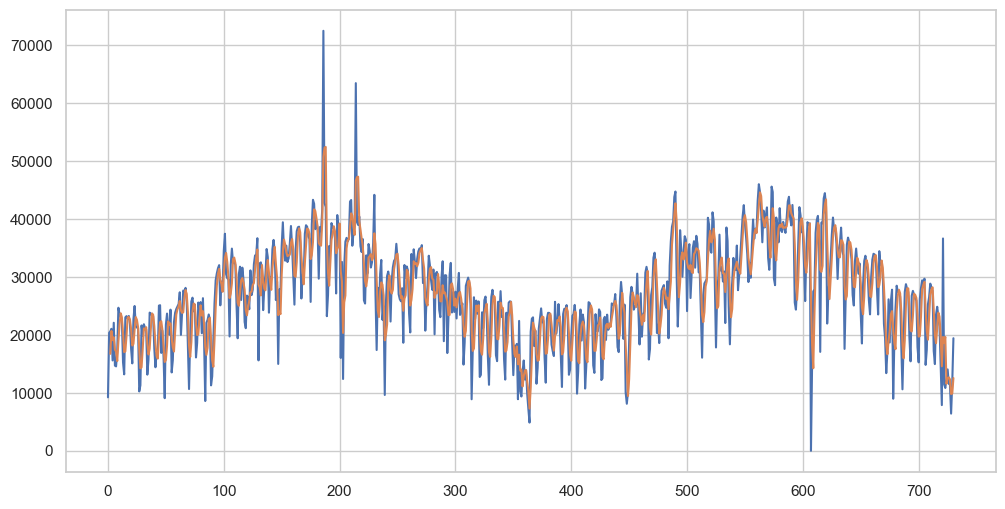

In [14]:
df_by_day.cnt.plot()
df_by_day_roll.cnt.plot()

In [15]:
df_by_day_roll.query("timestamp == '2015-07-09'")

C:\Users\spit\AppData\Local\Temp\ipykernel_21188\3825446354.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_by_day_roll.query("timestamp == '2015-07-09'")


,timestamp,cnt
186,2015-07-09,50705.0


#### Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.
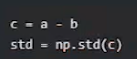

In [16]:
round(np.std(df_by_day['cnt'] - df_by_day_roll['cnt']), 2 )

4558.59

In [17]:
std = np.std(df_by_day['cnt'] - df_by_day_roll['cnt'])

#### Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.

In [18]:
upper = df_by_day_roll.cnt + (2.576 * std)
lower = df_by_day_roll.cnt - (2.576 * std)

In [19]:
df_by_day['upper'] = upper
df_by_day['lower'] = lower

In [20]:
df_by_day

,timestamp,cnt,upper,lower
0,2015-01-04,9234,NaN,NaN
1,2015-01-05,20372,NaN,NaN
2,2015-01-06,20613,28482.585854,4996.747479
3,2015-01-07,21064,32425.919188,8940.080812
4,2015-01-08,15601,30835.585854,7349.747479
...,...,...,...,...
726,2016-12-30,11566,24424.919188,939.080812
727,2016-12-31,11424,24090.252521,604.414146
728,2017-01-01,6421,21546.585854,-1939.252521
729,2017-01-02,11823,21632.252521,-1853.585854


#### Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.

In [21]:
df_by_day[df_by_day['cnt'] > df_by_day['upper']]

,timestamp,cnt,upper,lower
186,2015-07-09,72504,62447.919188,38962.080812
214,2015-08-06,63468,58370.252521,34884.414146
609,2016-09-04,27512,26001.919188,2516.080812
721,2016-12-25,36653,31393.585854,7907.747479


 в 2015-07-09 были забостовки работников в метро и поэтому оно не работала. В свяхи с этим был спрос на велосипеды

#### Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

In [22]:
df_by_day[df_by_day['cnt'] < df_by_day['lower']]

,timestamp,cnt,upper,lower
130,2015-05-14,15609,40452.252521,16966.414146
189,2015-07-12,23240,47779.585854,24293.747479
201,2015-07-24,16034,42756.585854,19270.747479
232,2015-08-24,17400,41272.252521,17786.414146
314,2015-11-14,8898,32780.252521,9294.414146
607,2016-09-02,0,37829.252521,14343.414146
615,2016-09-10,17080,43004.919188,19519.080812
621,2016-09-16,21967,47936.252521,24450.414146
678,2016-11-12,8990,32620.919188,9135.080812


In [23]:
df['2016-09-01':'2016-09-03']

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2016-09-01 00:00:00,2016-09-01 00:00:00,322,18.0,18.0,68.0,15.0,1.0,0.0,0.0,2.0
2016-09-01 01:00:00,2016-09-01 01:00:00,186,17.0,17.0,73.0,16.0,1.0,0.0,0.0,2.0
2016-09-01 02:00:00,2016-09-01 02:00:00,89,16.5,16.5,75.0,16.0,1.0,0.0,0.0,2.0
2016-09-01 03:00:00,2016-09-01 03:00:00,56,16.0,16.0,74.5,11.0,2.0,0.0,0.0,2.0
2016-09-01 04:00:00,2016-09-01 04:00:00,64,16.0,16.0,77.0,12.0,2.0,0.0,0.0,2.0
2016-09-01 05:00:00,2016-09-01 05:00:00,133,15.0,15.0,82.0,11.0,2.0,0.0,0.0,2.0
2016-09-01 06:00:00,2016-09-01 06:00:00,811,15.0,15.0,82.0,12.0,2.0,0.0,0.0,2.0
2016-09-01 07:00:00,2016-09-01 07:00:00,2663,16.0,16.0,77.0,11.0,2.0,0.0,0.0,2.0
2016-09-01 08:00:00,2016-09-01 08:00:00,4631,16.5,16.5,75.0,9.0,2.0,0.0,0.0,2.0


вероятнее всего произошел сбой в сборе данных